# Traffic Light

https://chartschool.stockcharts.com/table-of-contents/technical-indicators-and-overlays/technical-indicators/traffic-light#adding_the_traffic_light_indicator_to_a_chart

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)
df.index = pd.Index(df.index.date, name="Date")

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615883,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608818,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797447,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261932,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108662,82271200


In [3]:
n = 20  # You can adjust this period as needed

# Calculate the moving average
df['SMA'] = df['Close'].rolling(window=n).mean()

# Define thresholds (you can adjust these as needed)
upper_threshold = 1.05  # 5% above the moving average
lower_threshold = 0.95  # 5% below the moving average

# Create bullish, neutral, and bearish zones
df['Upper'] = df['SMA'] * upper_threshold
df['Lower'] = df['SMA'] * lower_threshold
    

In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,Upper,Lower
Date,,,,,,,,,
2018-01-30,41.382500,41.842499,41.174999,41.742500,39.368603,184192800,43.583500,45.762675,41.404325
2018-01-31,41.717499,42.110001,41.625000,41.857498,39.477062,129915600,43.523125,45.699281,41.346969
2018-02-01,41.792500,42.154999,41.689999,41.945000,39.559586,188923200,43.467500,45.640875,41.294125
2018-02-02,41.500000,41.700001,40.025002,40.125000,37.843075,346375200,43.310875,45.476419,41.145331
2018-02-05,39.775002,40.970001,39.000000,39.122501,36.897621,290954000,43.079500,45.233475,40.925525


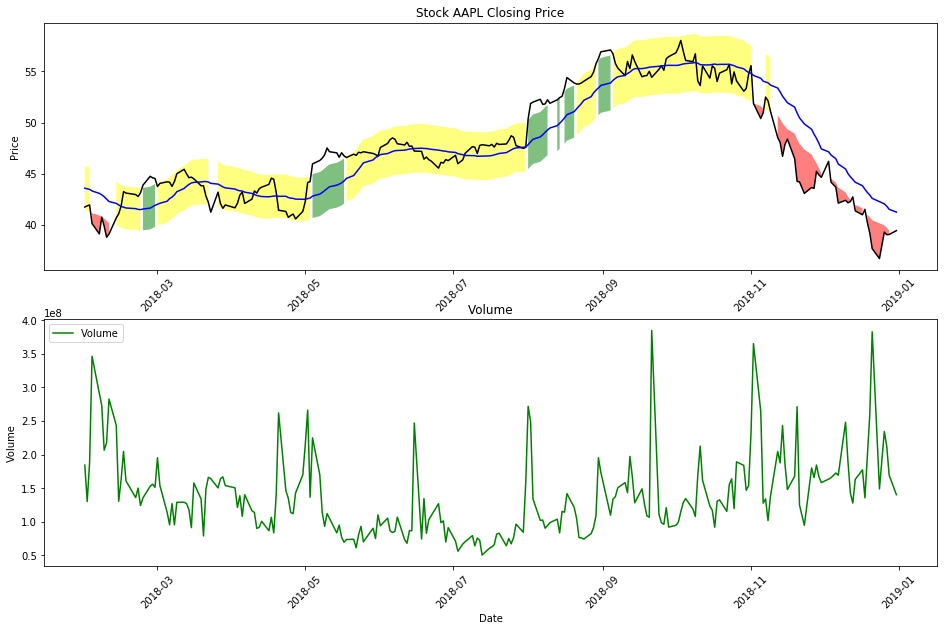

In [5]:
# Create the figure and subplots
fig = plt.figure(figsize=(16, 10))

ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Close'], label='Close Price', color='black')
ax1.plot(df.index, df['SMA'], label=f'{n}-Day SMA', color='blue')
ax1.fill_between(df.index, df['Upper'], df['Lower'], where=df['Close'] > df['Upper'], facecolor='green', alpha=0.5, label='Bullish Zone')
ax1.fill_between(df.index, df['Upper'], df['Lower'], where=(df['Close'] <= df['Upper']) & (df['Close'] >= df['Lower']), facecolor='yellow', alpha=0.5, label='Neutral Zone')
ax1.fill_between(df.index, df['Lower'], df['Close'], where=df['Close'] < df['Lower'], facecolor='red', alpha=0.5, label='Bearish Zone')

ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.tick_params(axis='x', rotation=45)

# Plot the Relative Volume (RVOL)
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Volume'], label='Volume', color='green')
ax2.set_title('Volume')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='best')

plt.show()

## Candlestick with Taffic Light

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,Upper,Lower,VolumePositive
0,736724.0,41.382500,41.842499,41.174999,41.742500,39.368603,184192800,43.583500,45.762675,41.404325,False
1,736725.0,41.717499,42.110001,41.625000,41.857498,39.477062,129915600,43.523125,45.699281,41.346969,False
2,736726.0,41.792500,42.154999,41.689999,41.945000,39.559586,188923200,43.467500,45.640875,41.294125,False
3,736727.0,41.500000,41.700001,40.025002,40.125000,37.843075,346375200,43.310875,45.476419,41.145331,False
4,736730.0,39.775002,40.970001,39.000000,39.122501,36.897621,290954000,43.079500,45.233475,40.925525,False


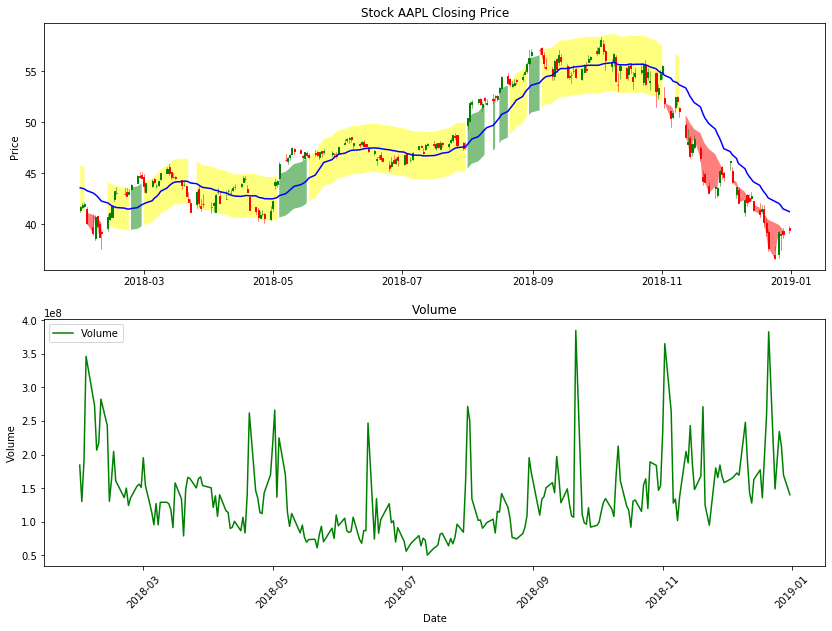

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.index, df['SMA'], label=f'{n}-Day SMA', color='blue')
ax1.fill_between(df.index, df['Upper'], df['Lower'], where=df['Close'] > df['Upper'], facecolor='green', alpha=0.5, label='Bullish Zone')
ax1.fill_between(df.index, df['Upper'], df['Lower'], where=(df['Close'] <= df['Upper']) & (df['Close'] >= df['Lower']), facecolor='yellow', alpha=0.5, label='Neutral Zone')
ax1.fill_between(df.index, df['Lower'], df['Close'], where=df['Close'] < df['Lower'], facecolor='red', alpha=0.5, label='Bearish Zone')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Volume'], label='Volume', color='green')
ax2.set_title('Volume')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='best')

plt.show()